In [4]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_34/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


## Introducción

En este desafío vamos a compara la performance de modelos de árboles de clasificación con el objetivo de mostrar que modelos más complejos no siempre performan mejor que los más simples. 

Vamos a entrenar varios modelos de clasificación basados en árboles de decisión para predecir si una pelicula va a obtener un premio oscar o no. 


## Dataset

En esta clase usaremos un dataset con info de películas ("Movie_classification.csv").  
Este dataset esta conformado por los siguientes features:  

 *   **Marketing expense:**    (float64)    Gasto total en Marketing      
 *   **Production expense:**   (float64)    Gasto total de Producción
 *   **Multiplex coverage:**   (float64)    Cobertura promedio de Multiplex
 *   **Budget:**               (float64)    Presupuesto
 *   **Movie_length:**         (float64)    Duración de la película
 *   **Lead_ Actor_Rating:**   (float64)    Puntaje sobre el actor principal
 *   **Lead_Actress_rating:**  (float64)    Puntaje sobre la actriz principal
 *   **Director_rating:**      (float64)    Puntaje sobre el Director
 *   **Producer_rating:**      (float64)    Puntaje sobre el Productor
 *   **Critic_rating:**        (float64)    Puntaje que le puso la crítica
 *   **Trailer_views:**        (int64)      Cantidad de vistas del Trailer
 *   **3D_available:**         (object)     Si esta disponible en 3D (Yes/No)
 *   **Time_taken:**           (float64)    Duración de la película
 *   **Twitter_hastags:**      (float64)    Cantidad de menciones en twitter
 *   **Genre:**                (object)     Genero de la película
 *   **Avg_age_actors:**       (int64)      Edad promedio de los actores
 *   **Num_multiplex:**        (int64)      Cantidad de Multiplex
 *   **Collection:**           (int64)      Recaudación
 *   **Start_Tech_Oscar:**     (int64)      Si recibió un oscar o no.
 
 

## Imports

In [5]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


## Ejercicio 1

Con la preparación de datos que hicimos en la notebook de checkpoint, creemos dos archivos csv uno para los datos de train y otro para los datos de test.

Guardemos los archivos en la carpeta Data de esta clase, con los campos separados por tab.

Después del ejercicio 5 de la práctica de checkpoint, guardamos los archivos de este modo:

```
X_train.to_csv("../Data/Movie_classification_train_X.csv", sep="\t", header=True, index = False)

X_test.to_csv("../Data/Movie_classification_test_X.csv", sep="\t", header=True, index = False)

y_train.to_csv("../Data/Movie_classification_train_y.csv", sep="\t", header=True, index = False)

y_test .to_csv("../Data/Movie_classification_test_y.csv", sep="\t", header=True, index = False)
```

## Ejercicio 2

Leamos desde la carpeta Data, en instancias de DataFrame, los datos de train y test resultados del paso anterior.

In [6]:
X_train = pd.read_csv("../Data/Movie_classification_train_X.csv", sep="\t")
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,21.5750,61.88,0.563,37674.010,114.6,8.095,8.150,8.065,8.115,7.96,480787,156.80,265.120,23,423,64000,1,0,0,1
1,40.0490,71.28,0.462,37074.070,160.8,7.735,8.030,7.820,7.935,6.80,466851,180.40,243.360,50,488,42000,0,0,0,1
2,42.6162,71.28,0.462,31735.715,167.6,7.740,7.910,7.815,8.070,6.80,350102,197.08,242.032,34,586,25400,0,0,1,0
3,22.0168,75.02,0.453,37301.825,155.1,8.595,8.685,8.500,8.870,8.44,495560,113.12,263.648,34,544,45600,1,0,0,1
4,52.5728,98.78,0.376,27880.545,173.5,9.185,9.340,9.145,9.450,7.76,233100,199.76,242.304,43,561,28800,1,1,0,0


In [7]:
y_train = pd.read_csv("../Data/Movie_classification_train_y.csv", sep="\t")
y_train.head()

,Start_Tech_Oscar
0,1
1,1
2,1
3,0
4,1


In [8]:
X_test = pd.read_csv("../Data/Movie_classification_test_X.csv", sep="\t")
X_test.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,22.5158,61.88,0.563,36418.580,102.6,7.690,7.860,7.660,7.655,8.96,537380,151.92,204.768,40,460,59600,1,0,0,1
1,28.7142,76.18,0.511,29685.920,173.5,8.025,8.070,7.930,8.225,7.28,367698,158.00,263.200,60,562,40000,0,1,0,0
2,21.4026,82.78,0.450,36896.310,158.6,8.240,8.405,8.155,8.360,7.72,461695,185.48,284.592,23,487,57400,0,1,0,0
3,306.6740,91.20,0.386,34602.095,161.5,8.865,9.090,8.960,9.185,6.96,457225,122.56,203.424,32,632,42800,0,0,0,1
4,154.3544,91.20,0.287,37490.695,166.1,8.800,8.945,8.815,8.800,7.96,401512,181.36,262.144,59,614,26800,1,0,1,0


In [9]:
y_test = pd.read_csv("../Data/Movie_classification_test_y.csv", sep="\t")
y_test.head()

,Start_Tech_Oscar
0,0
1,1
2,0
3,0
4,0


## Ejercicio 3

Usando los parametros por default de `DecisionTreeClassifier`entrenemos un modelo de clasificación que prediga si una película es ganadora de Un premio Oscar

Grafiquemos el árbol obtenido y observemos la complejidad del modelo creado.

In [10]:
my_default_tree_gini = tree.DecisionTreeClassifier(random_state=17)
my_default_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [11]:
my_default_tree_gini.feature_importances_

array([0.04089453, 0.01767806, 0.00837686, 0.18302635, 0.0899928 ,
       0.03336211, 0.00341776, 0.00976502, 0.0339425 , 0.08259743,
       0.07739088, 0.12763498, 0.05121048, 0.07666364, 0.04320597,
       0.09157483, 0.01835463, 0.        , 0.00262571, 0.00828547])

In [12]:
y_pred_test = my_default_tree_gini.predict(X_test)

In [13]:
confusion_matrix(y_test, y_pred_test)

array([[35, 34],
       [27, 56]])

In [14]:
accuracy_score(y_test, y_pred_test)

0.5986842105263158

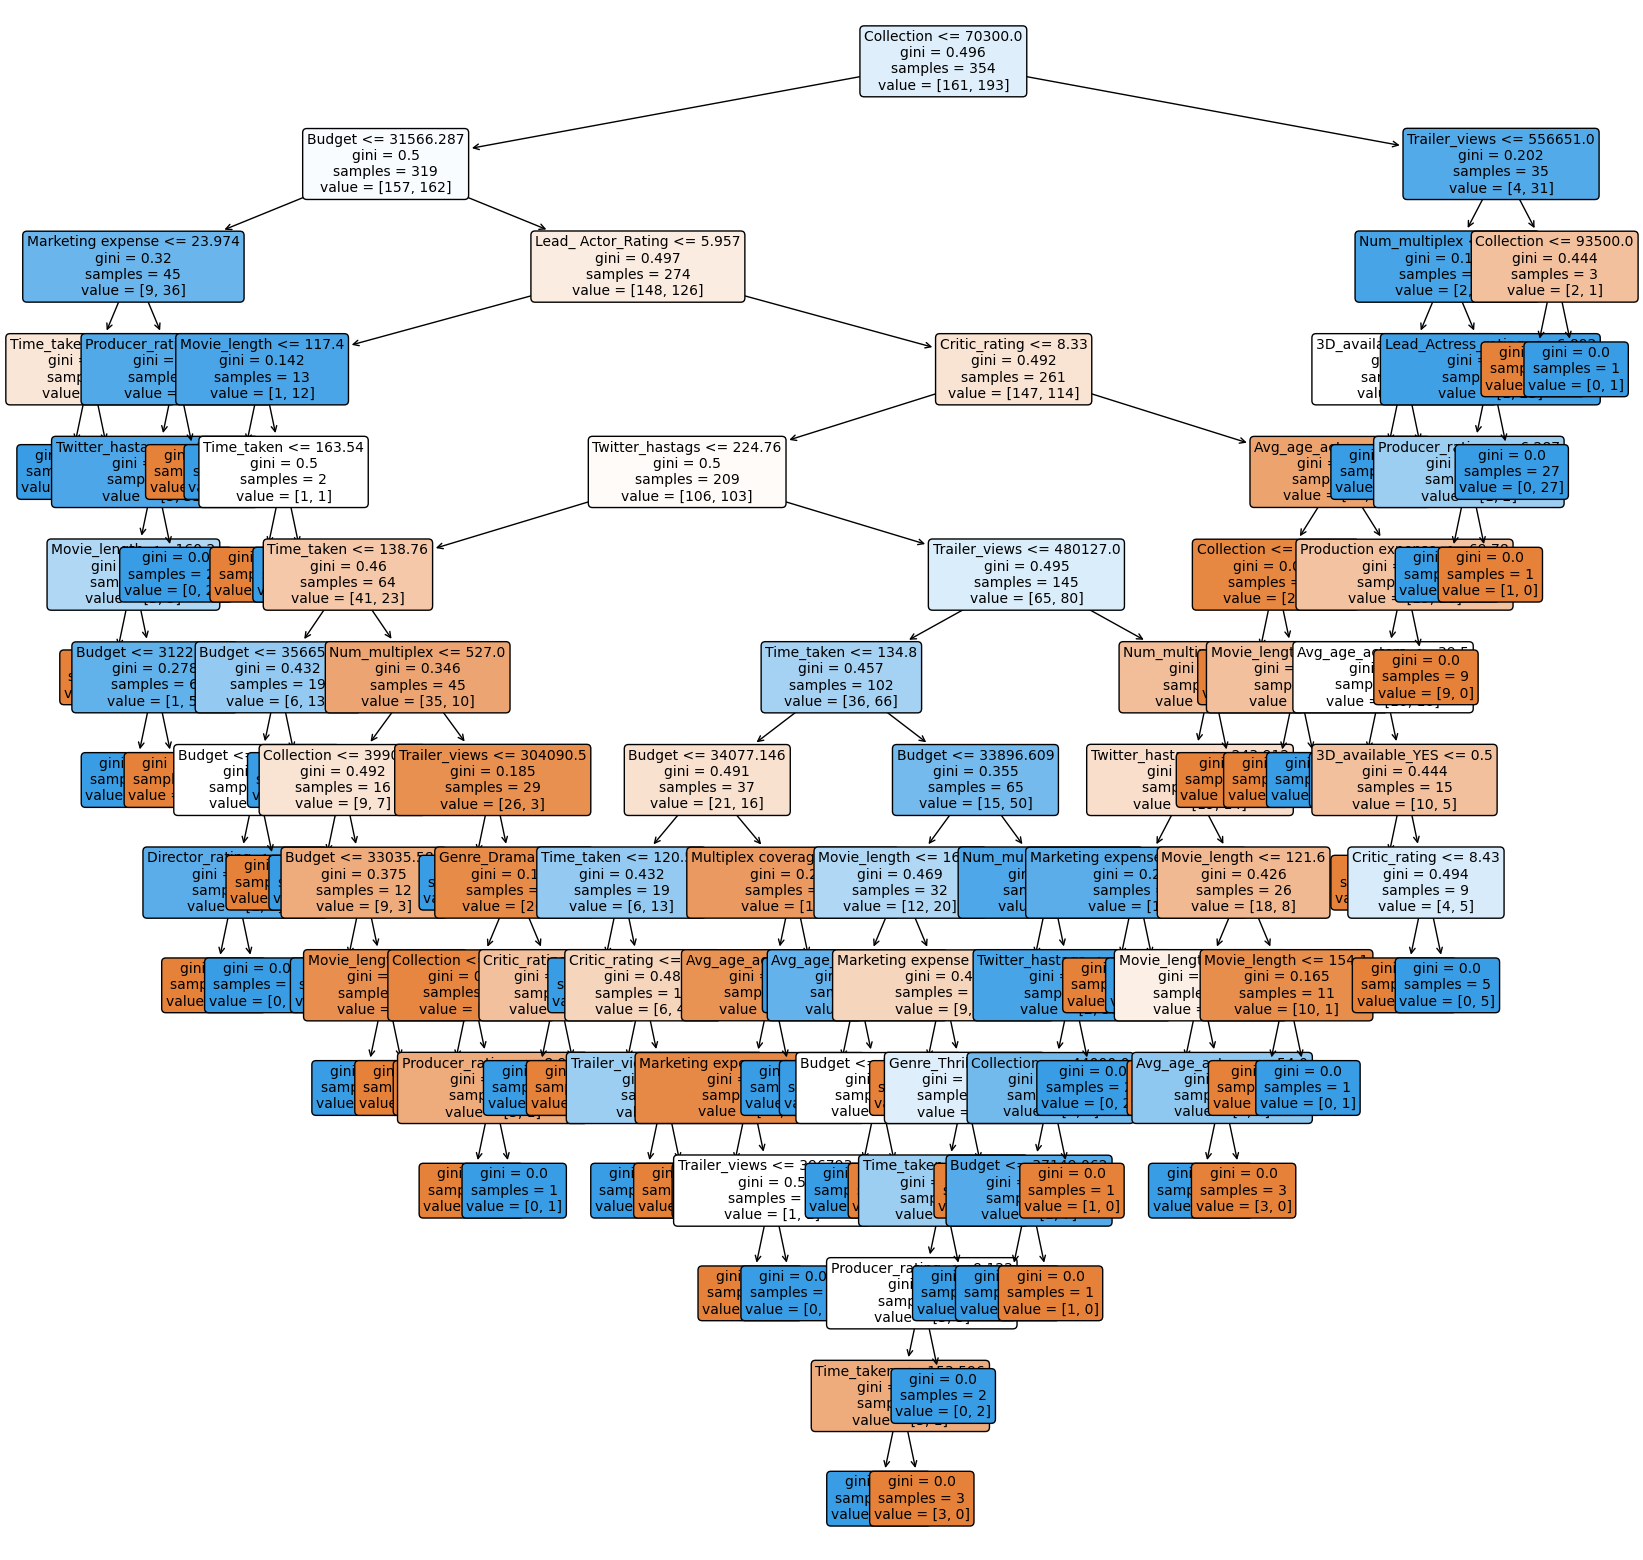

In [15]:
plt.figure(figsize=(20,20))
tree.plot_tree(my_default_tree_gini,feature_names = X_train.columns,filled=True,rounded=True, fontsize=10)
plt.show()

## Ejercicio 4

Sabemos que el modelo por default usa Gini como criterio de pureza.

Comparemos el modelo obtenido en el punto anterior con uno que use entropía. 

Para eso, entrenemos el modelo con todos los parámetros por default, excepto el criterio de pureza, y evaluemos las métricas de accuracy y confusion matrix para ambos modelos.

Grafiquemos el modelo obtenido.

¿Podemos concluir que la performance de ambos modelos es equivalente?

Estos modelos ¿emplean en la clasificación todas las variables disponibles en el dataset? ¿Difieren las variables seleccionadas en cada uno?

In [16]:
my_default_tree_entropy = tree.DecisionTreeClassifier(criterion = "entropy", random_state=17)
my_default_tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=17)

In [17]:
my_default_tree_entropy.feature_importances_

array([0.07572382, 0.05109655, 0.02743741, 0.04860757, 0.        ,
       0.02889384, 0.01230621, 0.0332741 , 0.03007355, 0.07088819,
       0.1461066 , 0.07727634, 0.07482145, 0.08158461, 0.06071275,
       0.12733876, 0.01733357, 0.02730326, 0.00922141, 0.        ])

In [18]:
y_pred_test = my_default_tree_entropy.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred_test)

array([[48, 21],
       [37, 46]])

In [20]:
accuracy_score(y_test, y_pred_test)

0.618421052631579

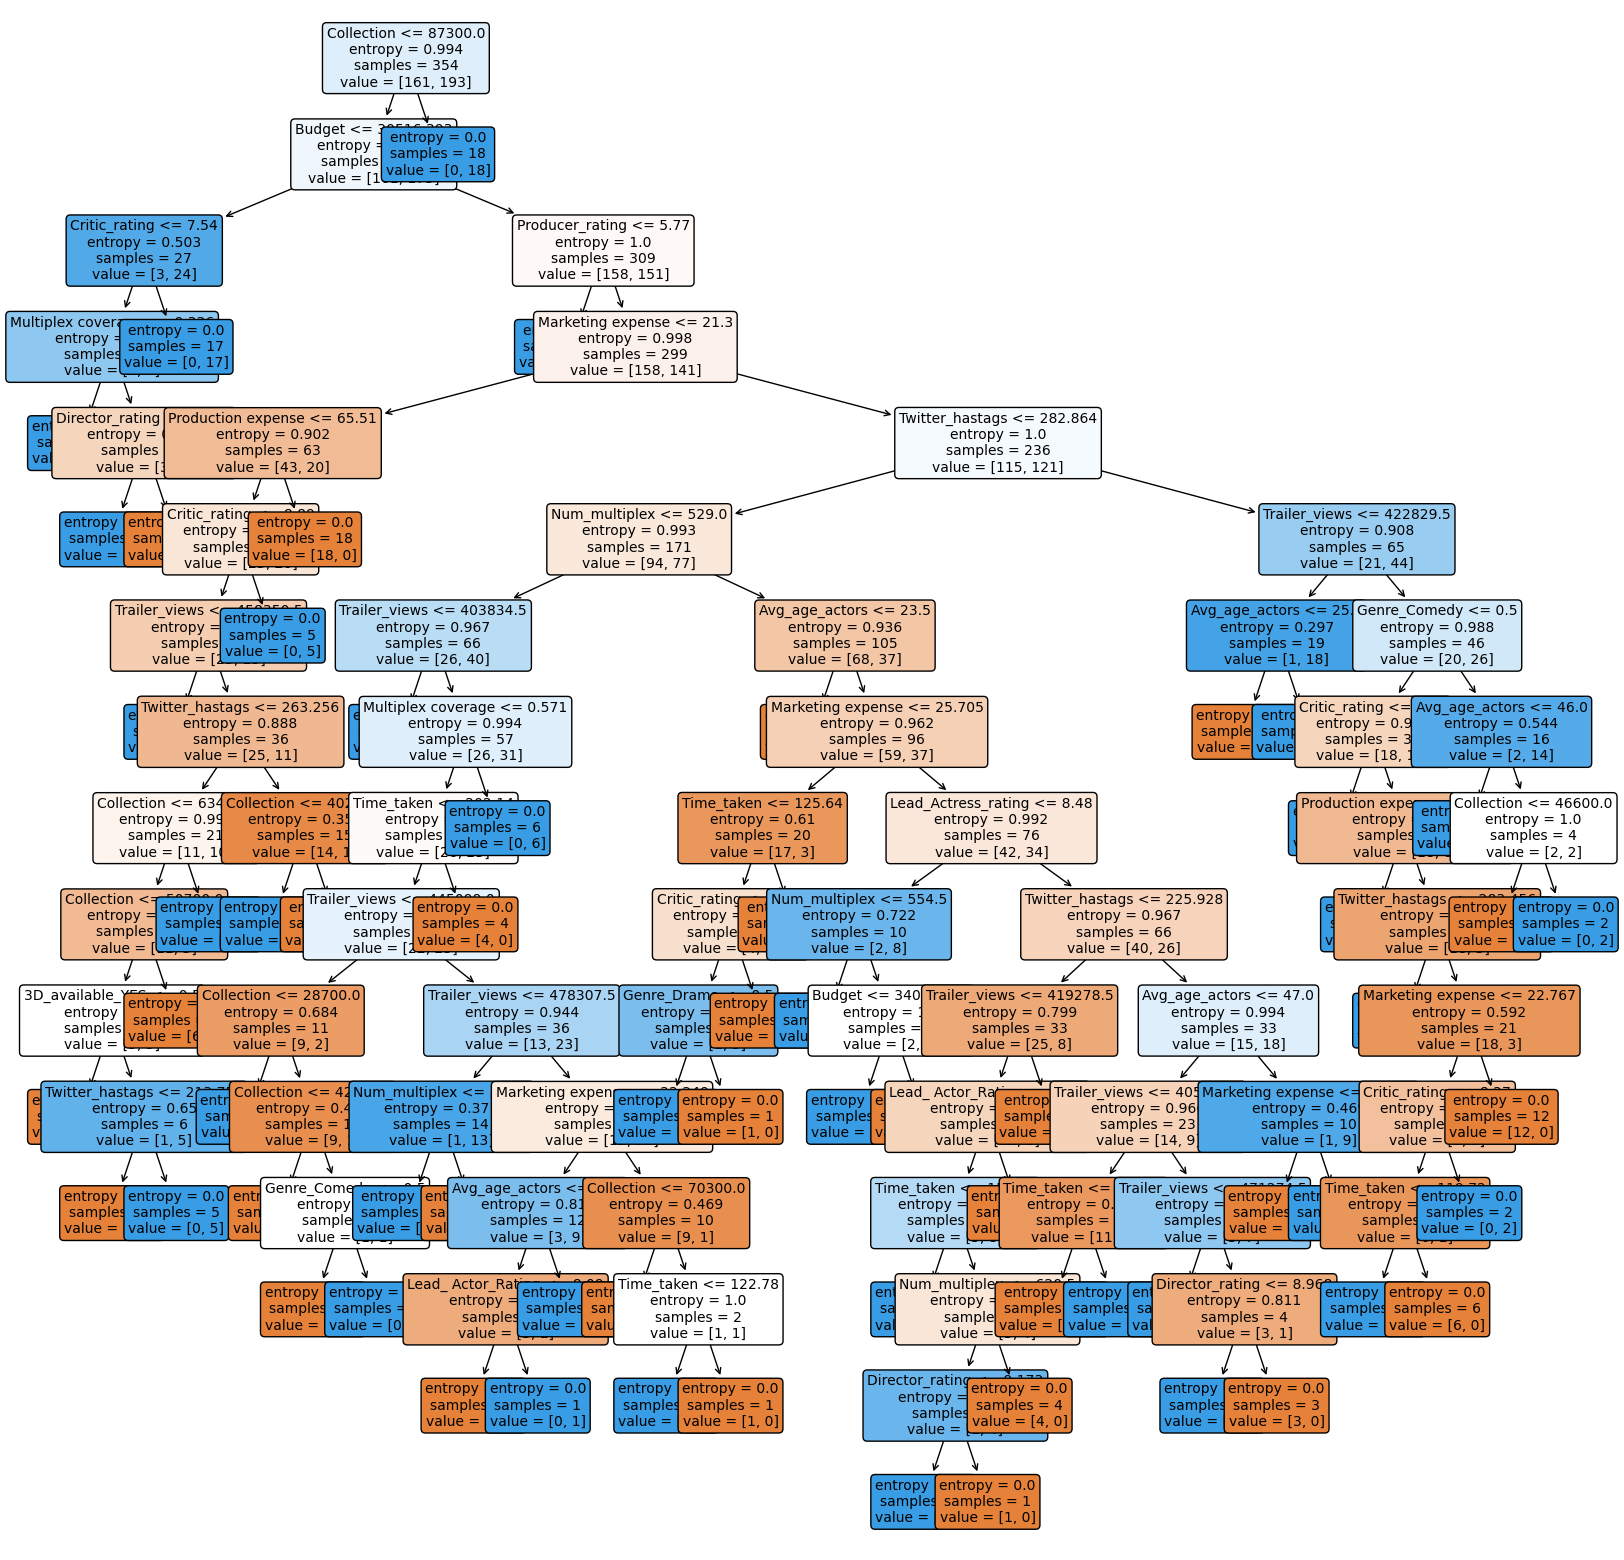

In [21]:
plt.figure(figsize=(20,20))
tree.plot_tree(my_default_tree_entropy,feature_names = X_train.columns,filled=True,rounded=True, fontsize=10)
plt.show()

**¿Podemos concluir que la performance de ambos modelos es equivalente?**

Sí, los valores de accuracy y confusion matrix obtenidos son muy similares.

**Estos modelos ¿emplean en la clasificación todas las variables disponibles en el dataset? ¿Difieren las veariables seleccionadas en cada uno?**

Mirando los valores de `feature_importances_`vemos que en cada modelo hay dos variables que no se usan como predictoras, pero son distintas en cada uno:

In [22]:
mask_gini_unused = my_default_tree_gini.feature_importances_ == 0
X_train.columns[mask_gini_unused]

Index(['Genre_Comedy'], dtype='object')

In [23]:
mask_entropy_unused = my_default_tree_entropy.feature_importances_ == 0
X_train.columns[mask_entropy_unused]

Index(['Movie_length', 'Genre_Thriller'], dtype='object')

## Ejercicio 5

Elijamos las cuatro variables de mayor importancia como variables predictoras y entrenemos otros dos modelos usando gini y entropia, definiendo como profundidad máxima 7.

Comparemos la performance obtenida con los entrenados en los ejercicios anteriores.

Grafiquemos estos dos nuevos modelos.

¿Qué podemos concluir comparando los cuatro modelos entrenados?

In [24]:
gini_importance = pd.DataFrame({'atributo':X_train.columns, 
                                'importancia': my_default_tree_gini.feature_importances_}).sort_values('importancia', ascending = False).iloc[0:4, :]
gini_importance

,atributo,importancia
3,Budget,0.183026
11,Time_taken,0.127635
15,Collection,0.091575
4,Movie_length,0.089993


In [25]:
gini_features = gini_importance.atributo.values
gini_features

array(['Budget', 'Time_taken', 'Collection', 'Movie_length'], dtype=object)

In [26]:
my_default_tree_entropy.feature_importances_

array([0.07572382, 0.05109655, 0.02743741, 0.04860757, 0.        ,
       0.02889384, 0.01230621, 0.0332741 , 0.03007355, 0.07088819,
       0.1461066 , 0.07727634, 0.07482145, 0.08158461, 0.06071275,
       0.12733876, 0.01733357, 0.02730326, 0.00922141, 0.        ])

In [27]:
X_train.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection', '3D_available_YES', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Thriller'],
      dtype='object')

In [28]:
entropy_importance = pd.DataFrame({'atributo':X_train.columns, 
                                'importancia': my_default_tree_entropy.feature_importances_}).sort_values('importancia', ascending = False).iloc[0:4, :]
entropy_importance

,atributo,importancia
10,Trailer_views,0.146107
15,Collection,0.127339
13,Avg_age_actors,0.081585
11,Time_taken,0.077276


In [29]:
entropy_features = entropy_importance.atributo.values
entropy_features

array(['Trailer_views', 'Collection', 'Avg_age_actors', 'Time_taken'],
      dtype=object)

In [30]:
my_tree_gini_4 = tree.DecisionTreeClassifier(random_state=17, max_depth = 7)
my_tree_gini_4.fit(X_train.loc[:, gini_features], y_train)

DecisionTreeClassifier(max_depth=7, random_state=17)

In [31]:
my_tree_entropy_4 = tree.DecisionTreeClassifier(random_state=17, max_depth = 7, criterion = "entropy")
my_tree_entropy_4.fit(X_train.loc[:, entropy_features], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)

In [32]:
y_pred_test_gini_4 = my_tree_gini_4.predict(X_test.loc[:, gini_features])
y_pred_test_entropy_4 = my_tree_entropy_4.predict(X_test.loc[:, entropy_features])

In [33]:
confusion_matrix(y_pred_test_gini_4, y_pred_test)

array([[58, 36],
       [27, 31]])

In [34]:
confusion_matrix(y_pred_test_entropy_4, y_pred_test)

array([[12,  6],
       [73, 61]])

In [35]:
accuracy_score(y_pred_test_gini_4, y_pred_test)

0.5855263157894737

In [36]:
accuracy_score(y_pred_test_entropy_4, y_pred_test)

0.48026315789473684

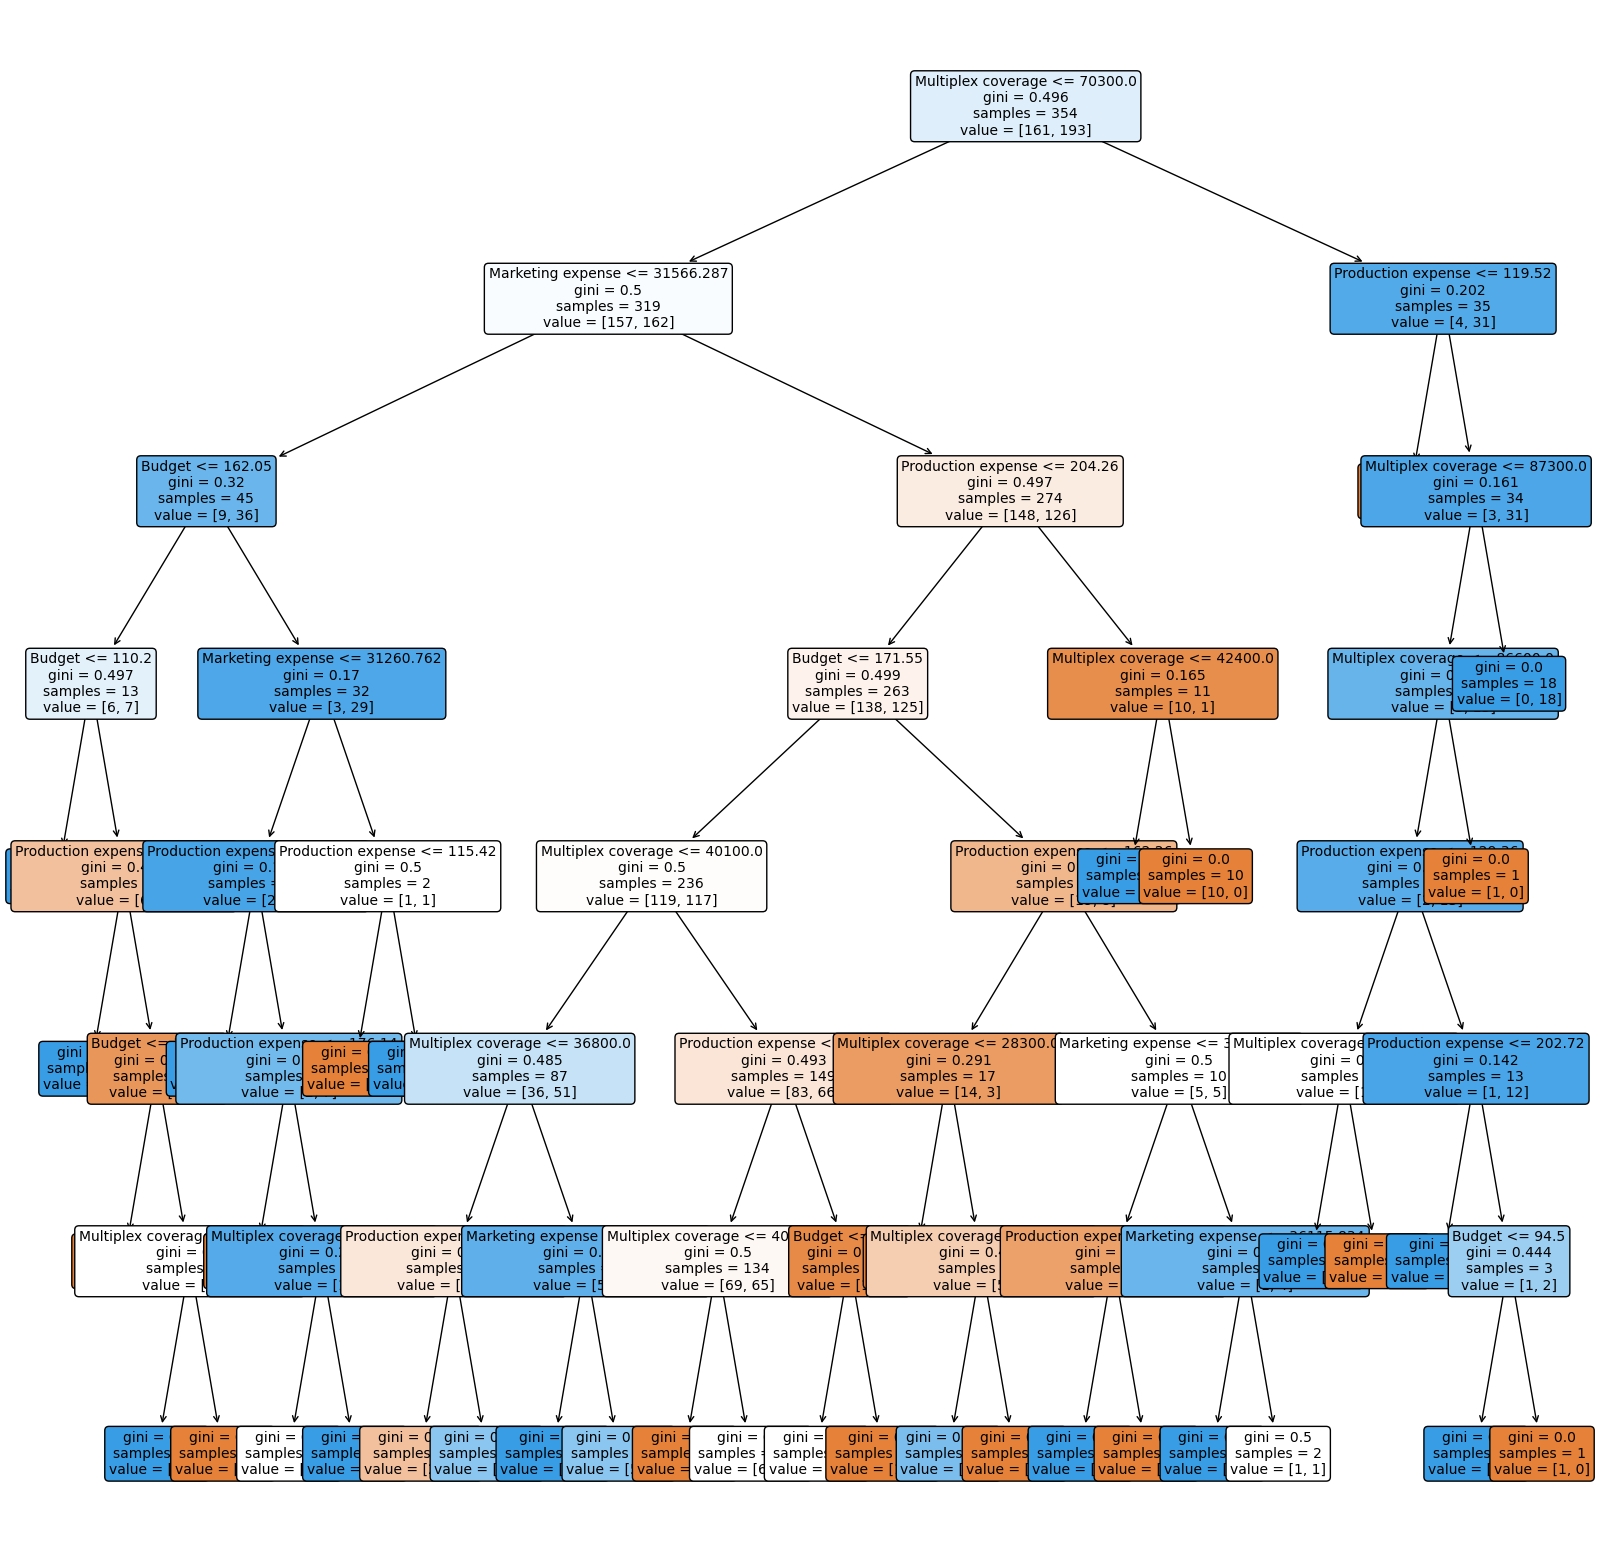

In [37]:
plt.figure(figsize=(20,20))
tree.plot_tree(my_tree_gini_4,feature_names = X_train.columns,filled=True,rounded=True, fontsize=10)
plt.show()

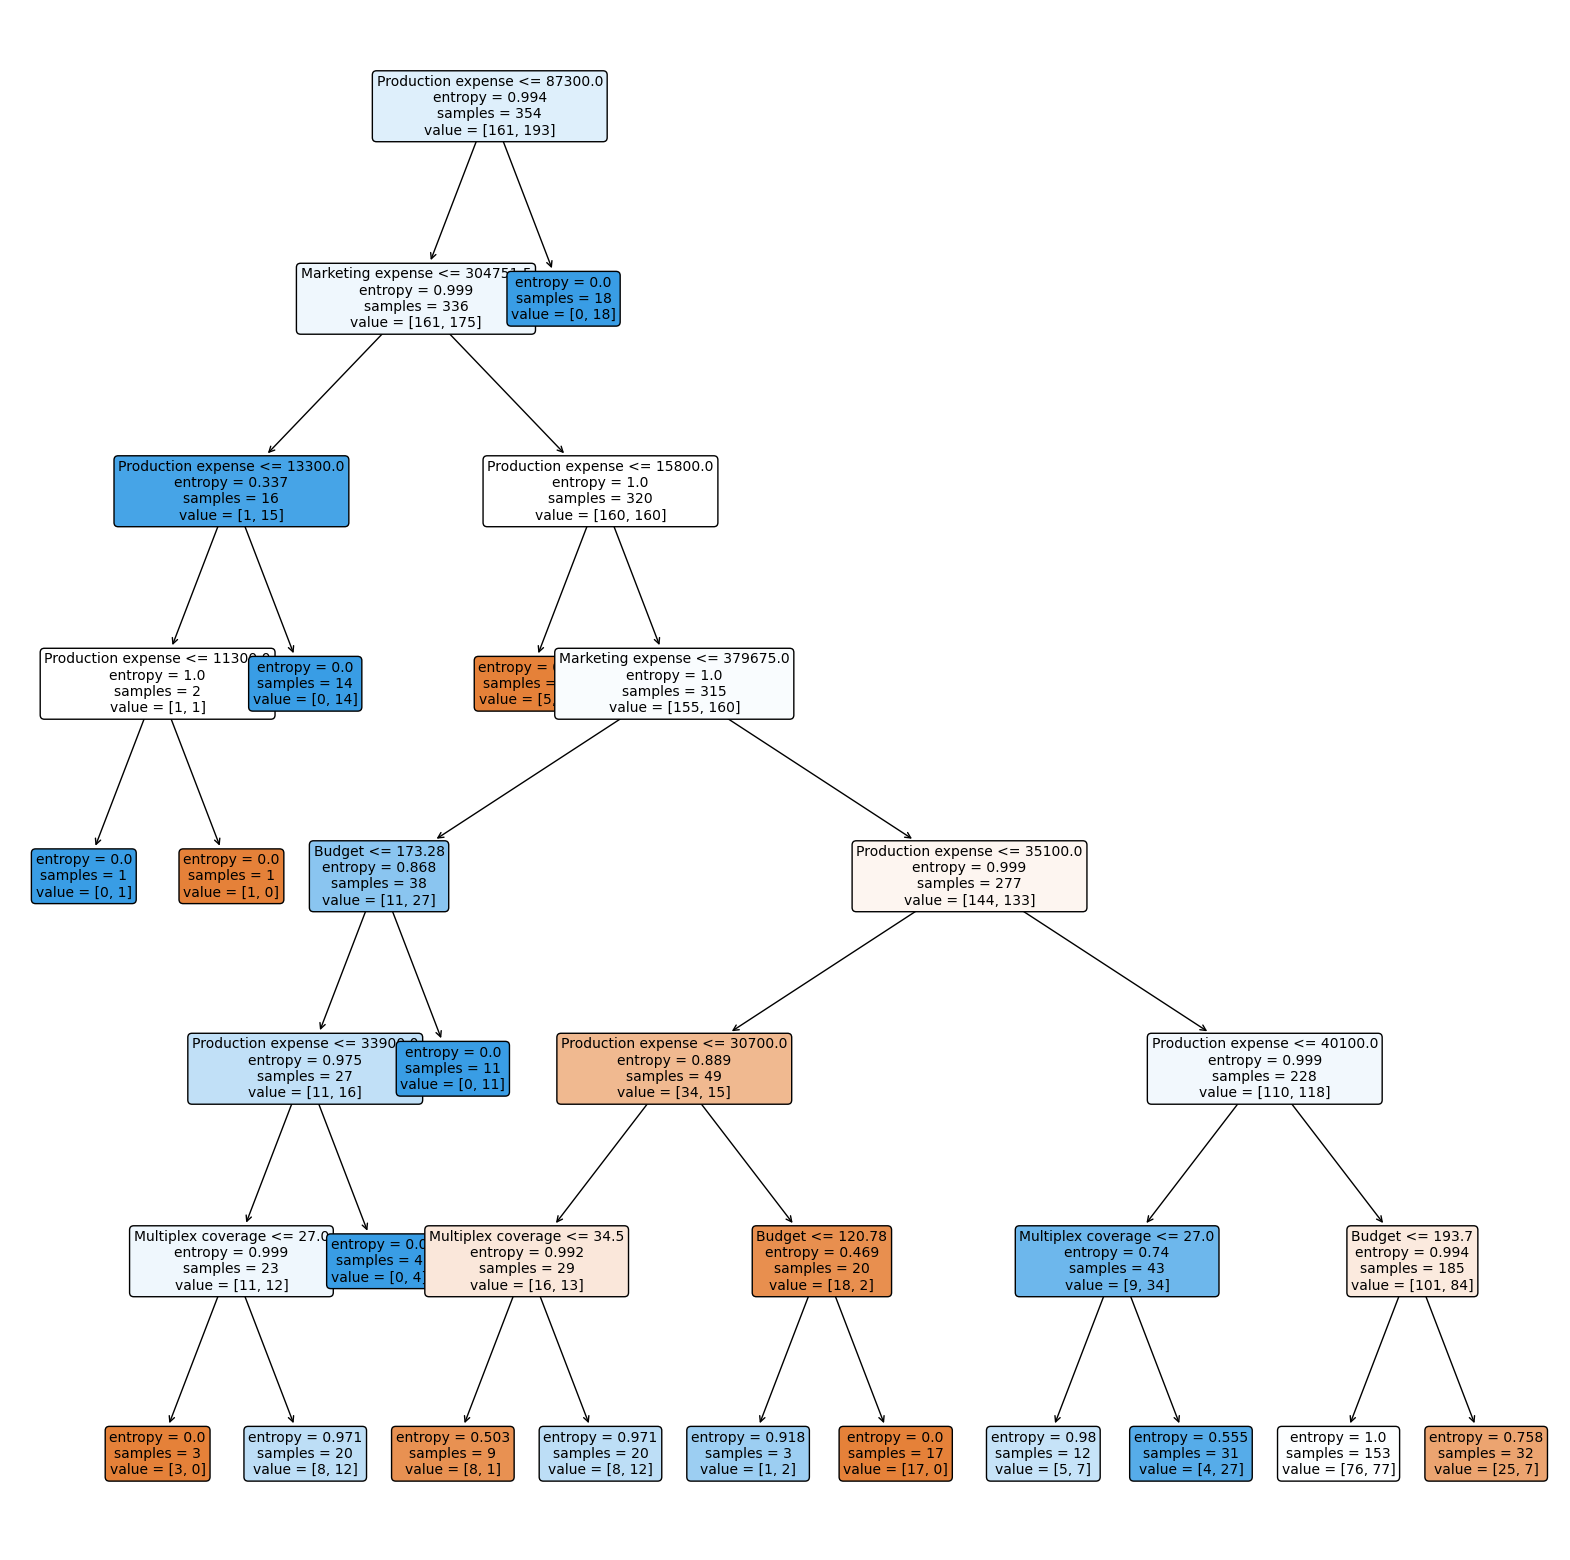

In [38]:
plt.figure(figsize=(20,20))
tree.plot_tree(my_tree_entropy_4,feature_names = X_train.columns,filled=True,rounded=True, fontsize=10)
plt.show()

## Conclusión

Vemos que 

* Los distintos criterios de pureza generan modelos distintos.

* La performance obtenida cuando sólo variamos el criterio de pureza y todos los demás parametros son iguales, es bastante parecida.

* Simplificando en extremo los árboles (sólo 4 features y limitando la altura máxima) obtenemos modelos de performance similar a los más complejos. Incluso si comparamos con el mejor árbol obtenido con cross validation en la práctica de checkpoint.
